# 📝 Curve Fitting

In engineering applications it is very common that you will be presented with data. To interpret data it is common to fit data to an model (a mathematical expression) that allows you to extract and interpret parameters. 



Computationally, the fitting process happens by minimizing some objective function. There are many optimization methods. This is a rich field of science and engineering.

SciPy is a package for scientific computing in python that has many built in tools for optimization and fitting.

## Curve Fitting Example

Suppose we have some data on a sine function

In [1]:
import numpy as np

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

When dealing with data it is always helpful to visualize the data as a graph

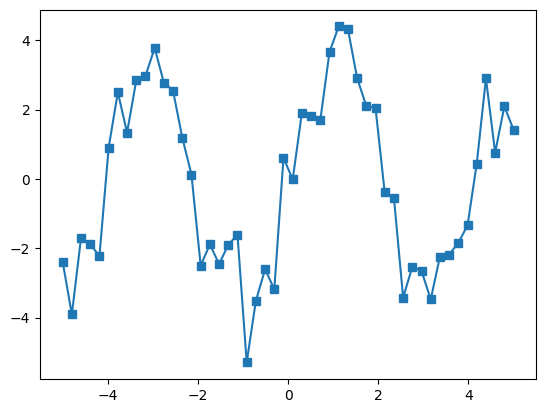

In [2]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, '-s')

If we know that the data lies on a sine wave, but not the amplitudes or the period, we can find those by least squares curve fitting. First we have to define the test function to fit, here a sine with unknown amplitude and period:

In [3]:
def test_func(x, a, b):
    return a * np.sin(b * x)

We then use scipy.optimize.curve_fit() to find a and b:

In [4]:
from scipy import optimize

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

[3.3007339  1.52162685]


## Visualizing our Results

Text(0.5, 0, 'Y')

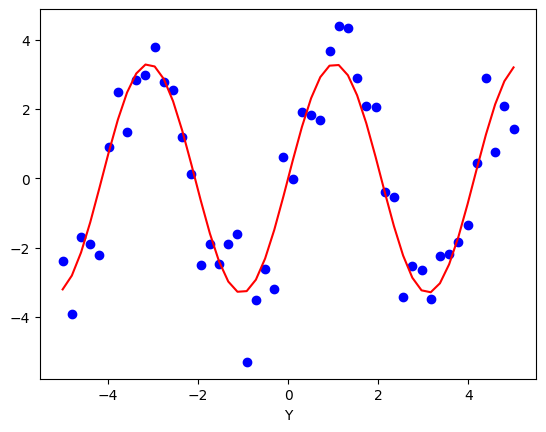

In [5]:
plt.plot(x_data, y_data, 'bo', label='Noisy data')
plt.plot(x_data, test_func(x_data, *params), 'red', label = 'Fitted function')
plt.xlabel('X')
plt.xlabel('Y')

## Example on a Exponential Function

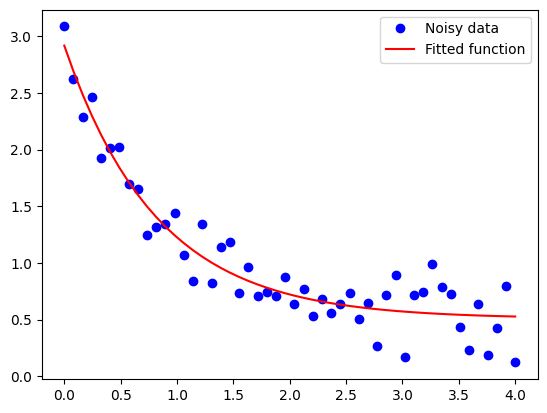

In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the exponential function to fit
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generate noisy data
xdata = np.linspace(0, 4, 50)
ydata = exp_func(xdata, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(xdata))

# Fit the data
popt, pcov = curve_fit(exp_func, xdata, ydata)

# Plot the data and fitted function
plt.plot(xdata, ydata, 'bo', label='Noisy data')
plt.plot(xdata, exp_func(xdata, *popt), 'r-', label='Fitted function')
plt.legend()
plt.show()
